In [2]:
pip install opencv-python-headless scikit-learn


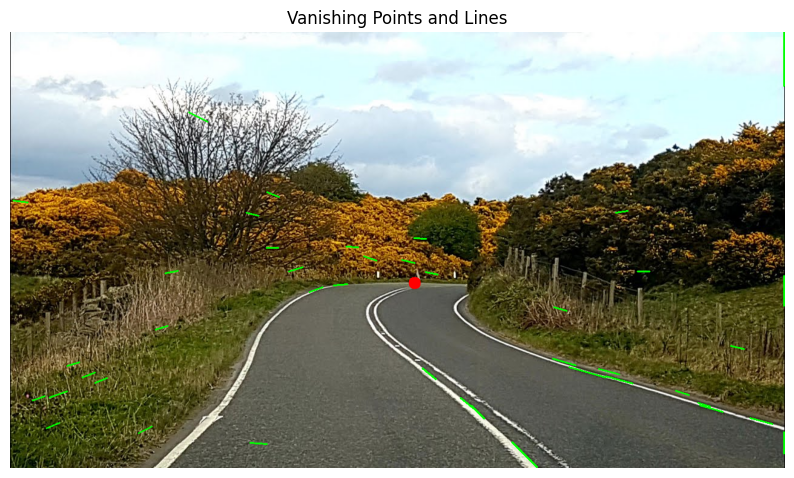

In [3]:
# Importing necessary libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
from sklearn.cluster import KMeans  # KMeans for clustering intersections
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Function to detect edges in the image using Canny edge detection
def detect_edges(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    return edges

# Function to detect lines in the edge-detected image using Hough Line Transform
def detect_lines(edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=20, maxLineGap=0.8)
    return lines

# Function to find intersections between lines
def find_intersections(lines):
    intersections = []
    # Loop through each pair of lines
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            # Calculate the intersection of the two lines
            intersection = calculate_intersection(line1, line2)
            if intersection is not None:
                intersections.append(intersection)
    return intersections

# Function to calculate the intersection point of two lines
def calculate_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None  # Parallel lines
    # Calculate intersection point (px, py)
    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return int(px), int(py)

# Function to cluster intersections using KMeans clustering
def cluster_intersections(intersections, n_clusters=3):
    if len(intersections) < n_clusters:
        return intersections  # Not enough points to cluster
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(intersections)
    return kmeans.cluster_centers_

# Function to draw lines on the image
def draw_lines(image, lines):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Draw line in green color
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

# Function to draw vanishing points on the image
def draw_vanishing_points(image, vanishing_points):
    for point in vanishing_points:
        # Draw vanishing point in red color
        cv2.circle(image, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)
    return image

# Main function to process the image and detect vanishing points
def main(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Detect edges in the image
    edges = detect_edges(image)
    # Detect lines in the edge-detected image
    lines = detect_lines(edges)

    if lines is not None:
        # Find intersections of the detected lines
        intersections = find_intersections(lines)
        # Cluster intersections to find vanishing points
        vanishing_points = cluster_intersections(intersections)
        # Draw lines on the original image
        image_with_lines = draw_lines(image.copy(), lines)
        # Draw vanishing points on the image with lines
        result_image = draw_vanishing_points(image_with_lines, vanishing_points)

        # Display the result image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Vanishing Points and Lines')
        plt.axis('off')
        plt.show()
    else:
        print("No lines detected.")

# Execute the main function with the provided image path
if __name__ == "__main__":
    main('/content/maxresdefault.jpg')


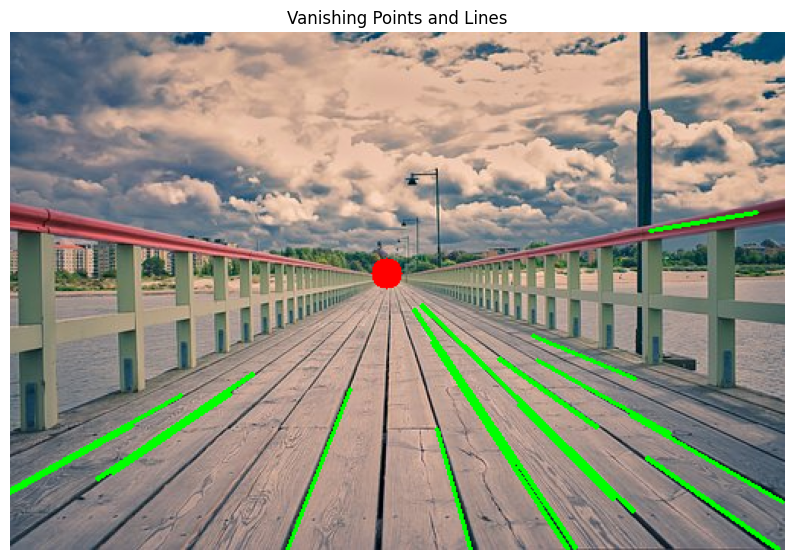

In [9]:
# Importing necessary libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
from sklearn.cluster import KMeans  # KMeans for clustering intersections
import matplotlib.pyplot as plt  # Matplotlib for visualization

# Function to detect edges in the image using Canny edge detection
def detect_edges(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    return edges

# Function to detect lines in the edge-detected image using Hough Line Transform
def detect_lines(edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=60, maxLineGap=0.8)
    return lines

# Function to find intersections between lines
def find_intersections(lines):
    intersections = []
    # Loop through each pair of lines
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            # Calculate the intersection of the two lines
            intersection = calculate_intersection(line1, line2)
            if intersection is not None:
                intersections.append(intersection)
    return intersections

# Function to calculate the intersection point of two lines
def calculate_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None  # Parallel lines
    # Calculate intersection point (px, py)
    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return int(px), int(py)

# Function to cluster intersections using KMeans clustering
def cluster_intersections(intersections, n_clusters=3):
    if len(intersections) < n_clusters:
        return intersections  # Not enough points to cluster
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(intersections)
    return kmeans.cluster_centers_

# Function to draw lines on the image
def draw_lines(image, lines):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Draw line in green color
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

# Function to draw vanishing points on the image
def draw_vanishing_points(image, vanishing_points):
    for point in vanishing_points:
        # Draw vanishing point in red color
        cv2.circle(image, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)
    return image

# Main function to process the image and detect vanishing points
def main(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Detect edges in the image
    edges = detect_edges(image)
    # Detect lines in the edge-detected image
    lines = detect_lines(edges)

    if lines is not None:
        # Find intersections of the detected lines
        intersections = find_intersections(lines)
        # Cluster intersections to find vanishing points
        vanishing_points = cluster_intersections(intersections)
        # Draw lines on the original image
        image_with_lines = draw_lines(image.copy(), lines)
        # Draw vanishing points on the image with lines
        result_image = draw_vanishing_points(image_with_lines, vanishing_points)

        # Display the result image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Vanishing Points and Lines')
        plt.axis('off')
        plt.show()
    else:
        print("No lines detected.")

# Execute the main function with the provided image path
if __name__ == "__main__":
    main('/content/vanishing-point-4468780__340.jpg')


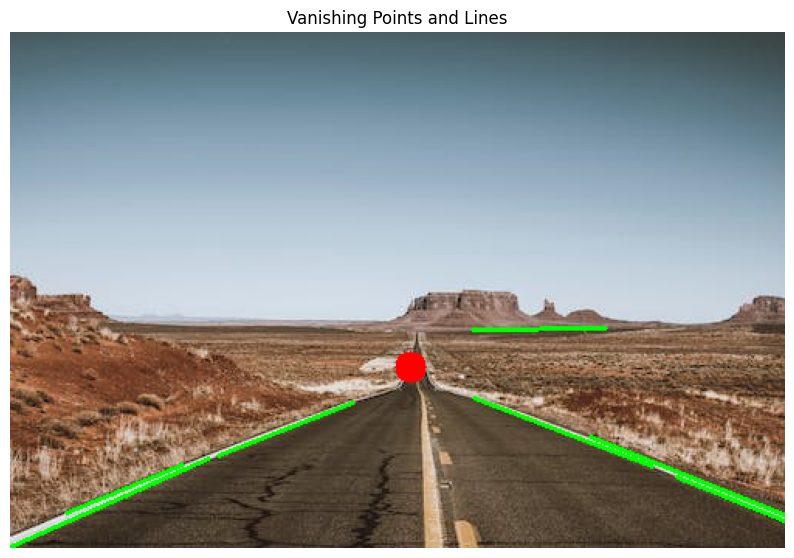

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
    return edges

def detect_lines(edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=60, maxLineGap=0.8)
    return lines

def find_intersections(lines):
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            intersection = calculate_intersection(line1, line2)
            if intersection is not None:
                intersections.append(intersection)
    return intersections

def calculate_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None  # Parallel lines
    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return int(px), int(py)

def cluster_intersections(intersections, n_clusters=3):
    if len(intersections) < n_clusters:
        return intersections  # Not enough points to cluster
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(intersections)
    return kmeans.cluster_centers_

def draw_lines(image, lines):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for lines
    return image

def draw_vanishing_points(image, vanishing_points):
    for point in vanishing_points:
        cv2.circle(image, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)  # Red color for vanishing points
    return image

def main(image_path):
    image = cv2.imread(image_path)
    edges = detect_edges(image)
    lines = detect_lines(edges)

    if lines is not None:
        # RANSAC for robust line fitting
        refined_lines = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if len(line) > 2:
                ransac = RANSACRegressor()
                X = np.array([[x1, y1], [x2, y2]])
                y = np.array([y1, y2])
                ransac.fit(X, y)
                inlier_mask = ransac.inlier_mask_
                if np.sum(inlier_mask) > 0:
                    refined_lines.append(line)
            else:
                refined_lines.append(line)

        intersections = find_intersections(refined_lines)
        vanishing_points = cluster_intersections(intersections)
        image_with_lines = draw_lines(image.copy(), refined_lines)
        result_image = draw_vanishing_points(image_with_lines, vanishing_points)

        # Display using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Vanishing Points and Lines')
        plt.axis('off')
        plt.show()
    else:
        print("No lines detected.")

if __name__ == "__main__":
    main('/content/pexels-photo-10622719.jpeg')


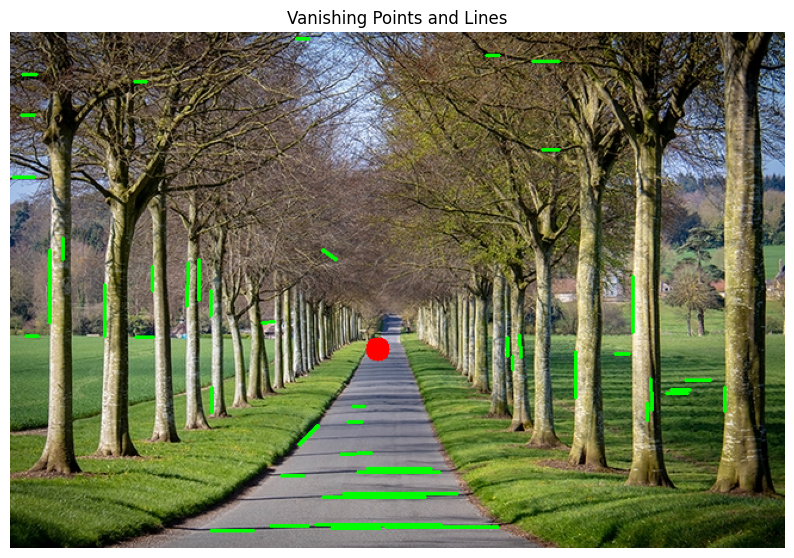

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
    return edges

def detect_lines(edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=150, minLineLength=10, maxLineGap=0.2)
    return lines

def find_intersections(lines):
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            intersection = calculate_intersection(line1, line2)
            if intersection is not None:
                intersections.append(intersection)
    return intersections

def calculate_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return None  # Parallel lines
    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denom
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denom
    return int(px), int(py)

def cluster_intersections(intersections, n_clusters=3):
    if len(intersections) < n_clusters:
        return intersections  # Not enough points to cluster
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(intersections)
    return kmeans.cluster_centers_

def draw_lines(image, lines):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color for lines
    return image

def draw_vanishing_points(image, vanishing_points):
    for point in vanishing_points:
        cv2.circle(image, (int(point[0]), int(point[1])), 10, (0, 0, 255), -1)  # Red color for vanishing points
    return image

def main(image_path):
    image = cv2.imread(image_path)
    edges = detect_edges(image)
    lines = detect_lines(edges)

    if lines is not None:
        # RANSAC for robust line fitting
        refined_lines = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if len(line) > 2:
                ransac = RANSACRegressor()
                X = np.array([[x1, y1], [x2, y2]])
                y = np.array([y1, y2])
                ransac.fit(X, y)
                inlier_mask = ransac.inlier_mask_
                if np.sum(inlier_mask) > 0:
                    refined_lines.append(line)
            else:
                refined_lines.append(line)

        intersections = find_intersections(refined_lines)
        vanishing_points = cluster_intersections(intersections)
        image_with_lines = draw_lines(image.copy(), refined_lines)
        result_image = draw_vanishing_points(image_with_lines, vanishing_points)

        # Display using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('Vanishing Points and Lines')
        plt.axis('off')
        plt.show()
    else:
        print("No lines detected.")

if __name__ == "__main__":
    main('/content/1603176284-vanishingpoint.jpg')
